In [ ]:
'''
Lecture viz_python_1

06/18/2021
Alec M.

See viz_python_2 lecture below
'''

# Lecture viz_python_1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("titanic.csv")

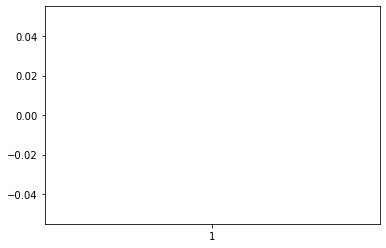

In [8]:
plt.boxplot(df["Age"]);

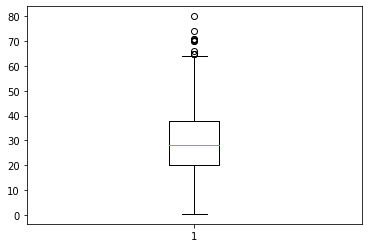

In [9]:
plt.boxplot(df["Age"].dropna()); # Hide rows with no value

In [13]:
df_temp = df[["Age", "Sex"]].dropna()
df_temp_m = df_temp[df_temp["Sex"] == "male"]
df_temp_f = df_temp[df_temp["Sex"] == "female"]

In [15]:
df_temp_m.head()

,Age,Sex
0,22.0,male
4,35.0,male
6,54.0,male
7,2.0,male
12,20.0,male


In [16]:
df_temp_f.head()

,Age,Sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female


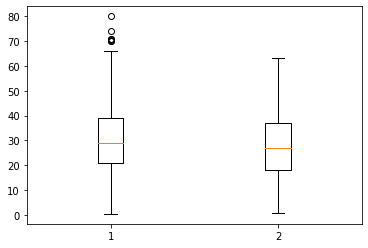

In [17]:
plt.boxplot([df_temp_m["Age"], df_temp_f["Age"]]);

In [18]:
import seaborn as sns

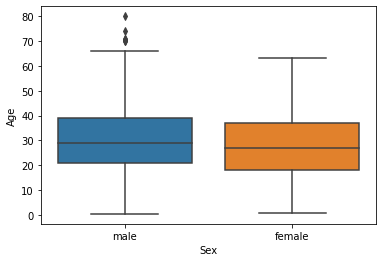

In [20]:
sns.boxplot(data = df, x = "Sex", y = "Age");

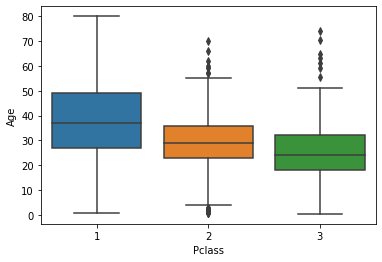

In [21]:
sns.boxplot(data = df, x = "Pclass", y = "Age");

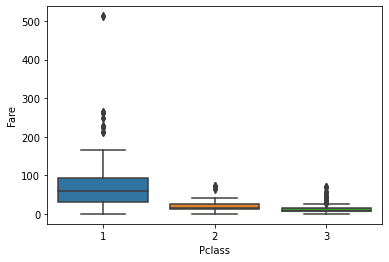

In [22]:
sns.boxplot(data = df, x = "Pclass", y = "Fare");

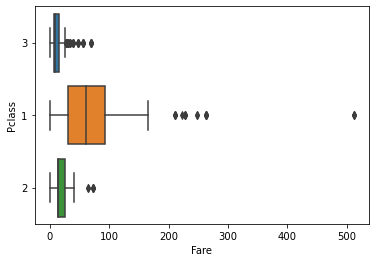

In [25]:
df["Pclass"] = df["Pclass"].apply(str)
sns.boxplot(data = df, x = "Fare", y = "Pclass"); # Swap axis by switching variables x/y

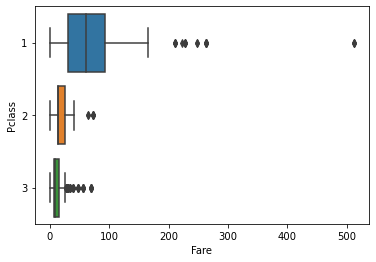

In [26]:
sns.boxplot(data = df, x = "Fare", y = "Pclass", order = ["1", "2", "3"]); # Force ordering of variables

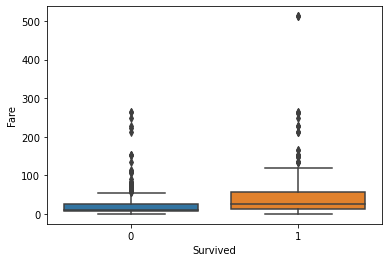

In [28]:
df["Survived"] = df["Survived"].apply(str)
sns.boxplot(data = df, x = "Fare", y = "Survived", order = ["0", "1"]);

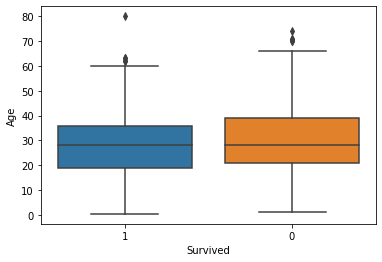

In [30]:
sns.boxplot(data = df, y = "Age", x = "Survived", order = ["1", "0"]);

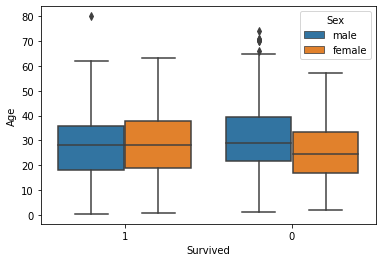

In [32]:
sns.boxplot(data = df, x = "Survived", y = "Age", order = ["1", "0"], hue = "Sex"); # Hue lays the two categories side-by-side

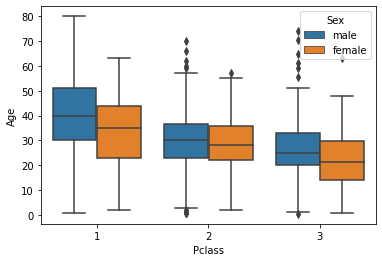

In [33]:
sns.boxplot(data = df, x = "Pclass", y = "Age", hue = "Sex", order = ["1", "2", "3"]);

In [34]:
df2 = df.sort_values(["Pclass", "Survived"]) # Resort in order to remove the need or order attr

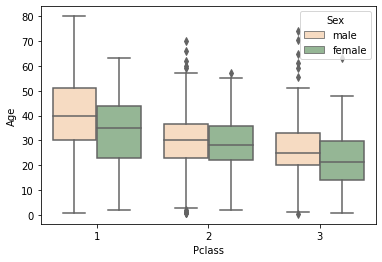

In [37]:
sns.boxplot(data = df2, x = "Pclass", y = "Age", hue = "Sex", palette = ["peachpuff", "darkseagreen"]);

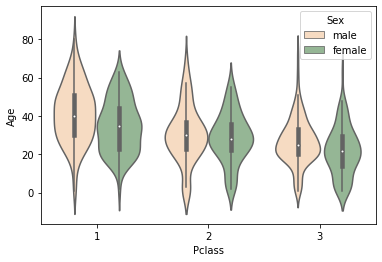

In [38]:
sns.violinplot(data = df2, x = "Pclass", y = "Age", hue = "Sex", palette = ["peachpuff", "darkseagreen"]);

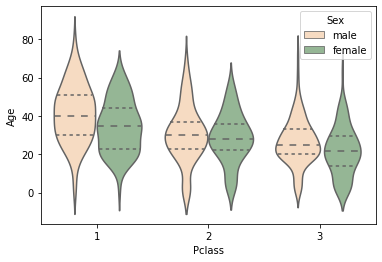

In [40]:
sns.violinplot(data = df2, x = "Pclass", y = "Age", hue = "Sex",
    palette = ["peachpuff", "darkseagreen"],
    inner = "quartile");

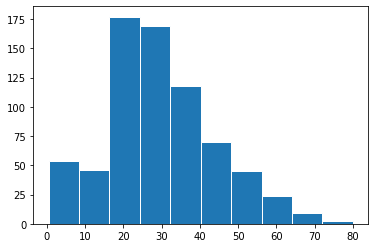

In [43]:
plt.hist(df["Age"], edgecolor = "white");

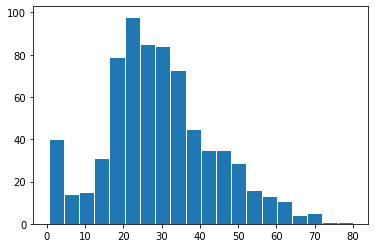

In [44]:
plt.hist(df["Age"], edgecolor = "white", bins = 20);

Text(0, 0.5, 'Frequency')

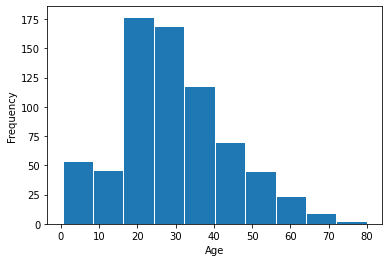

In [46]:
plt.hist(df["Age"], edgecolor = "white");
plt.xlabel("Age");
plt.ylabel("Frequency");

In [48]:
import matplotlib.mlab as mlab
from scipy.stats import norm

In [50]:
mu,sigma = norm.fit(df["Age"].dropna())

In [51]:
mu

29.69911764705882

In [52]:
sigma

14.516321150817316

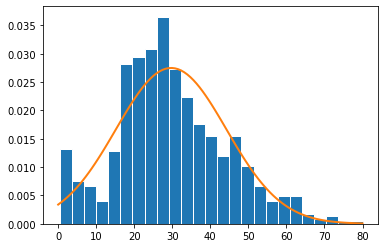

In [63]:
plt.hist(df["Age"], edgecolor = "white", bins = 25, density = True);
ages = np.linspace(0, 80, 100)
plt.plot(ages, norm.pdf(ages, mu, sigma), linewidth = 2);
plt.show();

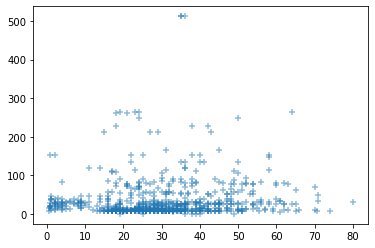

In [70]:
df_nanas = df[["Age", "Fare"]].dropna()
plt.scatter(x = df_nanas["Age"], y = df_nanas["Fare"], marker = "+", alpha = 0.5);

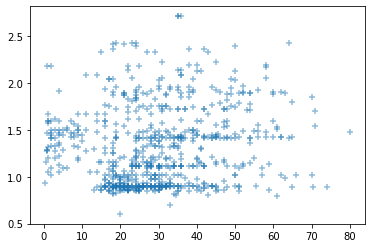

In [72]:
plt.scatter(x = df_nanas["Age"], y = np.log10(df_nanas["Fare"]), marker = "+", alpha = 0.5);

/home/nachfolger/.local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


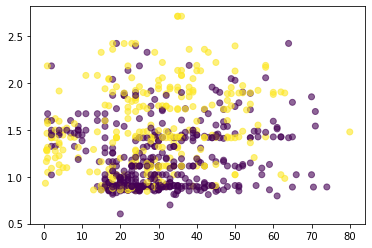

In [75]:
df_nanas = df[["Age", "Fare", "Survived", "Pclass"]].dropna()
plt.scatter(x = df_nanas["Age"], y = np.log10(df_nanas["Fare"]), c = pd.to_numeric(df_nanas["Survived"]), alpha = 0.6);

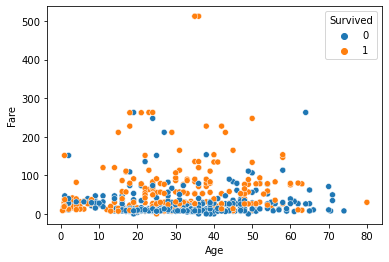

In [77]:
sns.scatterplot(data = df, x = "Age", y = "Fare", hue = "Survived"); # SNS auto drops NA values

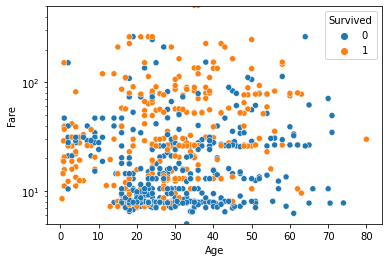

In [81]:
plot = sns.scatterplot(data = df, x = "Age", y = "Fare", hue = "Survived"); # SNS auto drops NA values
plot.set_yscale("log");
plt.ylim(5, 500);

In [82]:
# Save graph (.svg / .pdf)
plt.savefig("test_fig_1.pdf")

<Figure size 432x288 with 0 Axes>

In [83]:
# sns.despine()
# sns.despine(left = True)
# sns.set_style

# Lecture viz_python_2

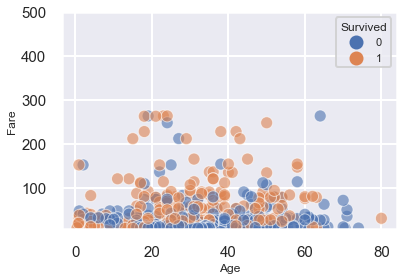

In [88]:
sns.set_theme()

sns.set_context("poster", font_scale = 0.5, rc = {"grid.linewidth": 2, "xtick.labelsize": 15, "ytick.labelsize": 15});
sns.scatterplot(data = df, x = "Age", y = "Fare", hue = "Survived", alpha = 0.6);
plt.ylim(5, 500);

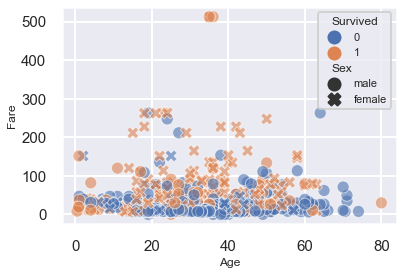

In [90]:
sns.scatterplot(data = df, x = "Age", y = "Fare", hue = "Survived", style = "Sex", alpha = 0.6);

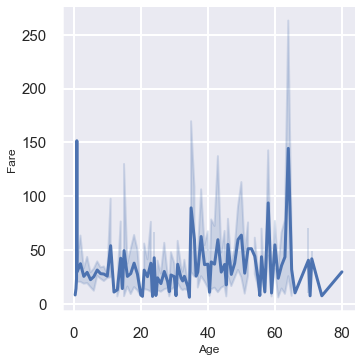

In [92]:
sns.relplot(data = df, x = "Age", y = "Fare", kind = "line");

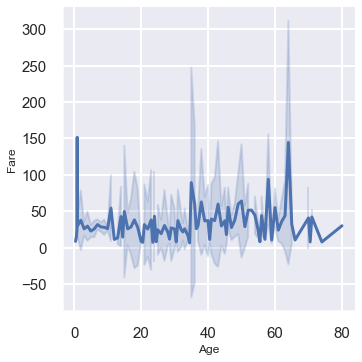

In [94]:
sns.relplot(data = df, x = "Age", y = "Fare", kind = "line", ci = "sd"); # Different shading styles

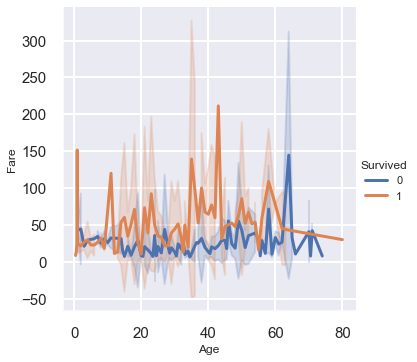

In [95]:
sns.relplot(data = df, x = "Age", y = "Fare", kind = "line", ci = "sd", hue = "Survived");

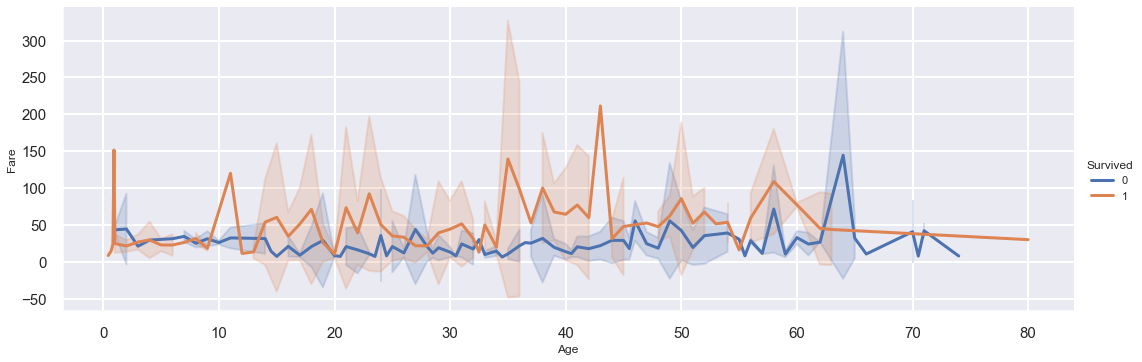

In [97]:
sns.relplot(data = df, x = "Age", y = "Fare", kind = "line", ci = "sd", hue = "Survived", aspect = 3); # Stretch axis

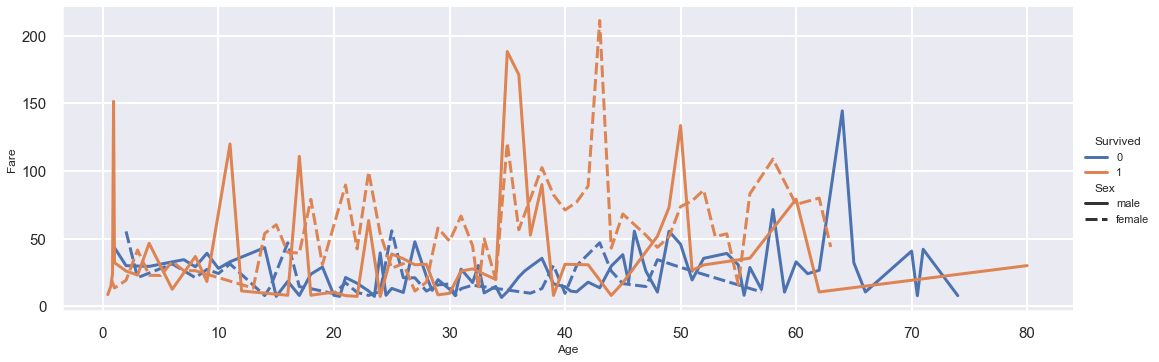

In [99]:
sns.relplot(data = df, x = "Age", y = "Fare", style = "Sex",  # Add styling
    kind = "line",
    ci = None,
    hue = "Survived",
    aspect = 3);

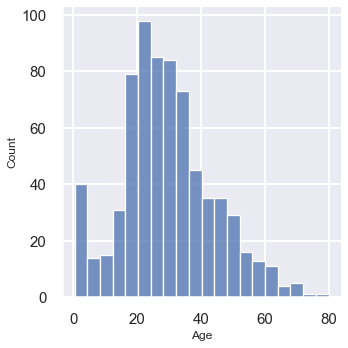

In [100]:
sns.displot(data = df, x = "Age");

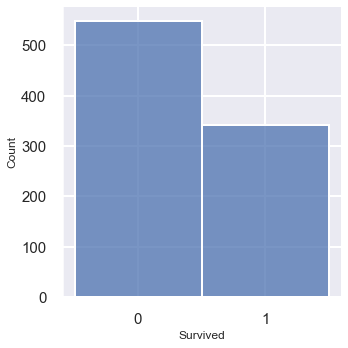

In [103]:
sns.displot(data = df, x = "Survived");

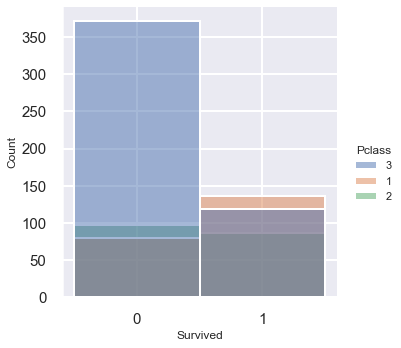

In [104]:
sns.displot(data = df, x = "Survived", hue = "Pclass"); # Causing confusing overlaying

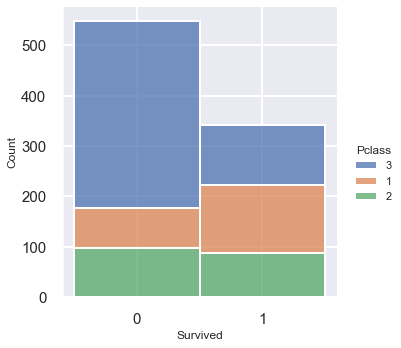

In [105]:
sns.displot(data = df, x = "Survived", hue = "Pclass", multiple = "stack"); # Disable overlaying

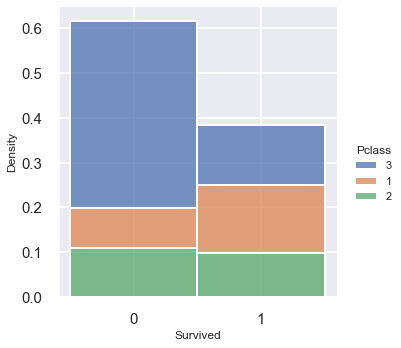

In [106]:
sns.displot(data = df, x = "Survived", hue = "Pclass", multiple = "stack", stat = "density"); # Add relative sizing

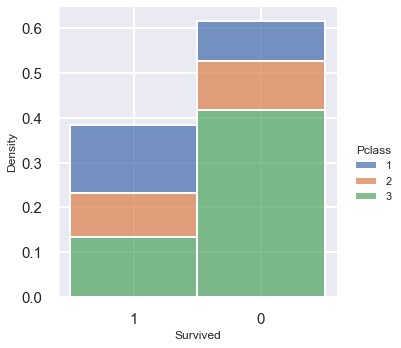

In [109]:
df2 = df.sort_values("Pclass")
sns.displot(data = df2, x = "Survived", hue = "Pclass", multiple = "stack", stat = "density");

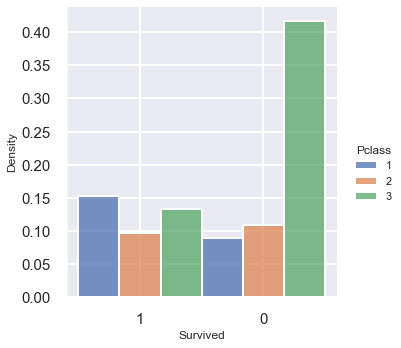

In [110]:
df2 = df.sort_values("Pclass")
sns.displot(data = df2, x = "Survived", hue = "Pclass", multiple = "dodge", stat = "density"); # Separate density bars

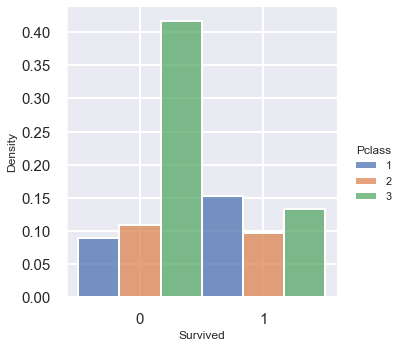

In [111]:
df2 = df.sort_values(["Pclass", "Survived"])
sns.displot(data = df2, x = "Survived", hue = "Pclass", multiple = "dodge", stat = "density"); # Separate density bars

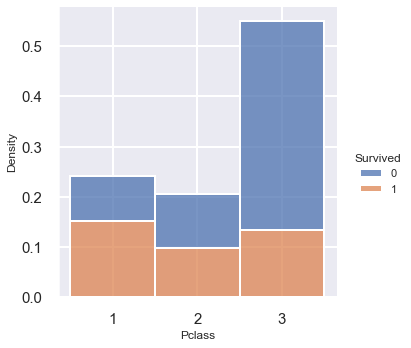

In [114]:
df2 = df.sort_values(["Pclass", "Survived"])
sns.displot(data = df2, hue = "Survived", x = "Pclass", multiple = "stack", stat = "density");

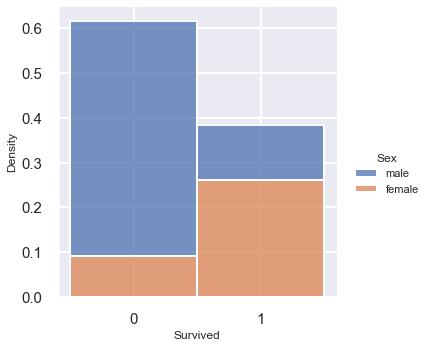

In [115]:
df2 = df.sort_values(["Pclass", "Survived"])
sns.displot(data = df2, x = "Survived", hue = "Sex", multiple = "stack", stat = "density"); 

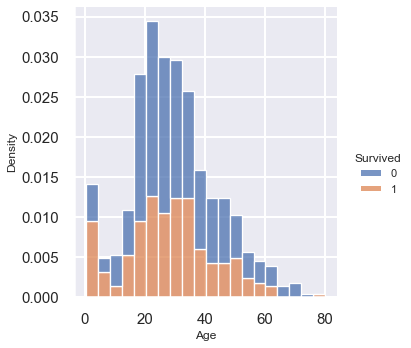

In [116]:
sns.displot(data = df, x = "Age", hue = "Survived", multiple = "stack", stat = "density");

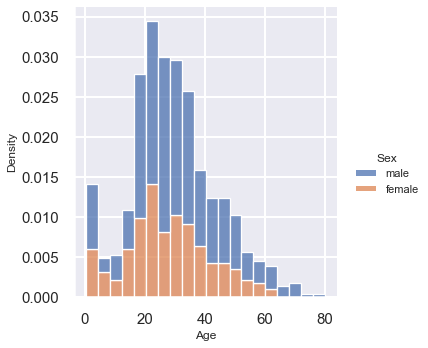

In [117]:
sns.displot(data = df, x = "Age", hue = "Sex", multiple = "stack", stat = "density");

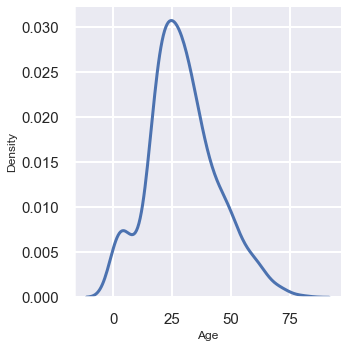

In [118]:
sns.displot(data = df, x = "Age", kind = "kde");

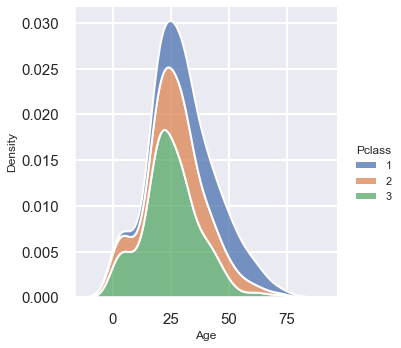

In [119]:
sns.displot(data = df2, x = "Age", hue = "Pclass", kind = "kde", multiple = "stack");

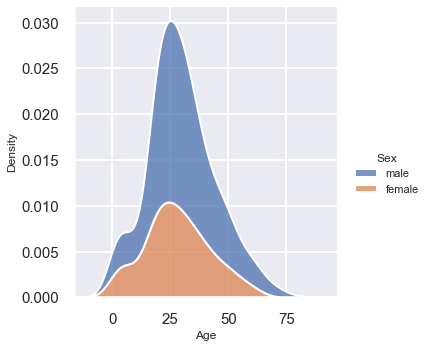

In [120]:
sns.displot(data = df2, x = "Age", hue = "Sex", kind = "kde", multiple = "stack");

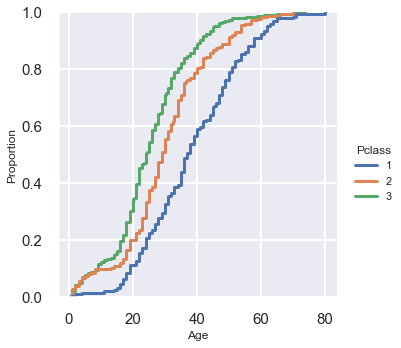

In [123]:
sns.displot(data = df2, x = "Age", hue = "Pclass", kind = "ecdf"); # Cumlative distribution

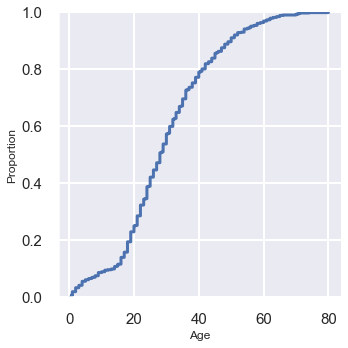

In [126]:
sns.displot(data = df2, x = "Age", kind = "ecdf"); # See maximum of data (100% are less than 80yrs old)

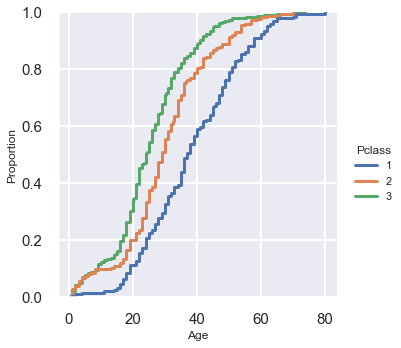

In [127]:
sns.displot(data = df2, x = "Age", hue = "Pclass", kind = "ecdf");

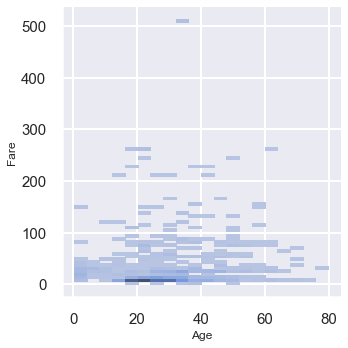

In [128]:
sns.displot(data = df, x = "Age", y = "Fare"); # Two numerical variables (joint plots)

In [129]:
bm = pd.read_csv("marathon_results_2017.csv")

In [130]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           26410 non-null  object 
 1   Age            26410 non-null  int64  
 2   M/F            26410 non-null  object 
 3   City           26410 non-null  object 
 4   State          22815 non-null  object 
 5   Country        26410 non-null  object 
 6   5K             26410 non-null  int64  
 7   10K            26410 non-null  int64  
 8   15K            26410 non-null  int64  
 9   20K            26410 non-null  int64  
 10  Half           26410 non-null  int64  
 11  25K            26410 non-null  int64  
 12  30K            26410 non-null  int64  
 13  35K            26410 non-null  int64  
 14  40K            26410 non-null  int64  
 15  Official Time  26410 non-null  int64  
 16  speed (km/h)   26410 non-null  float64
 17  speed (mph)    26410 non-null  float64
dtypes: flo

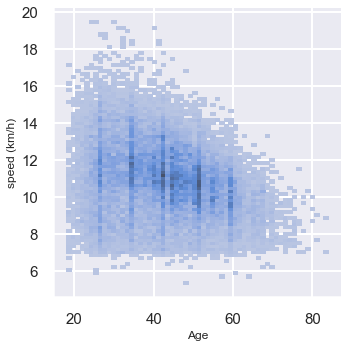

In [133]:
sns.displot(data = bm, x = "Age", y = "speed (km/h)"); # See correlation between age and speed

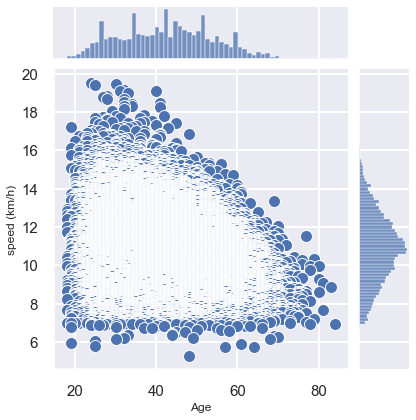

In [135]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)"); # Joint distributions of Age vs. Speed

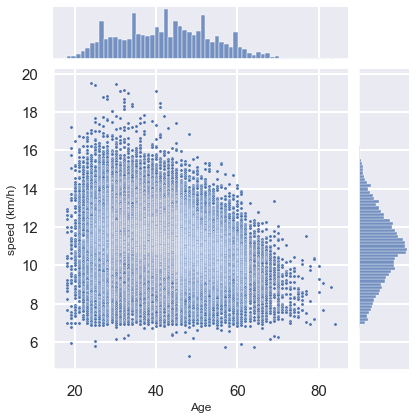

In [136]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)", s = 10);

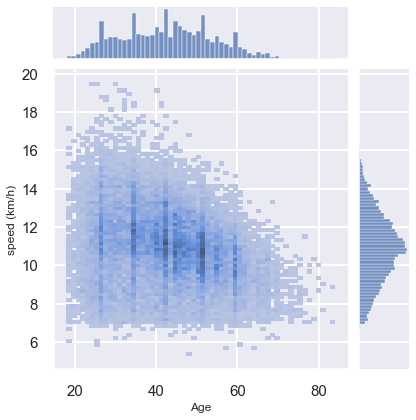

In [139]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)", kind = "hist"); # Histogram type

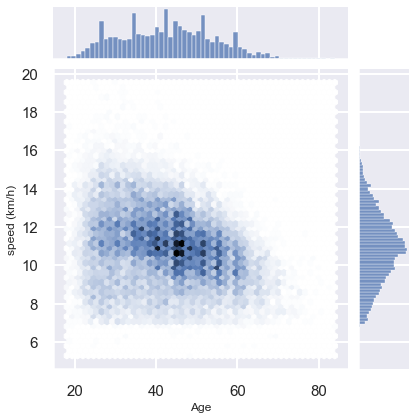

In [140]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)", kind = "hex");

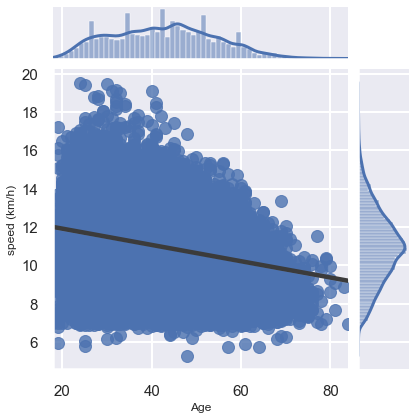

In [143]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)", kind = "reg", line_kws = {"color": "#3b3b3b"}); 

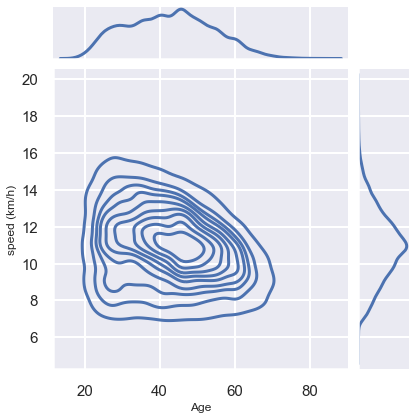

In [144]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)", kind = "kde"); 

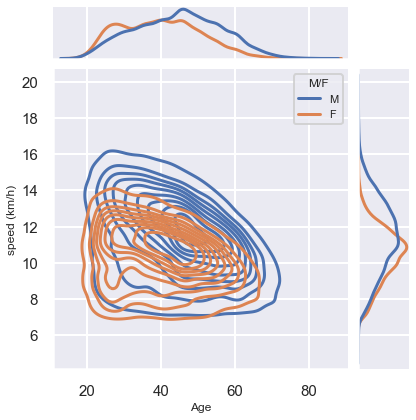

In [145]:
sns.jointplot(data = bm, x = "Age", y = "speed (km/h)", hue = "M/F", kind = "kde"); # See comparisons between sex

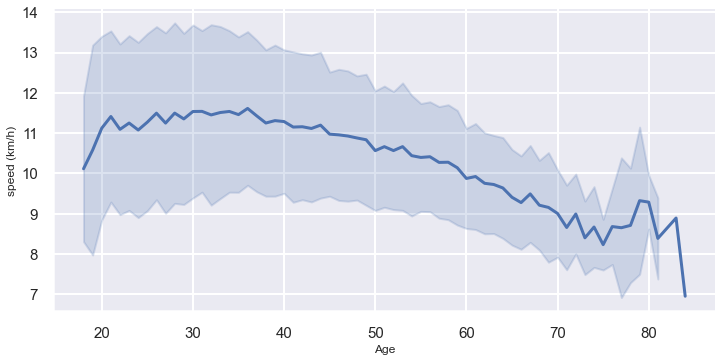

In [146]:
sns.relplot(data = bm, x = "Age", y = "speed (km/h)", kind = "line", ci = "sd", aspect = 2);

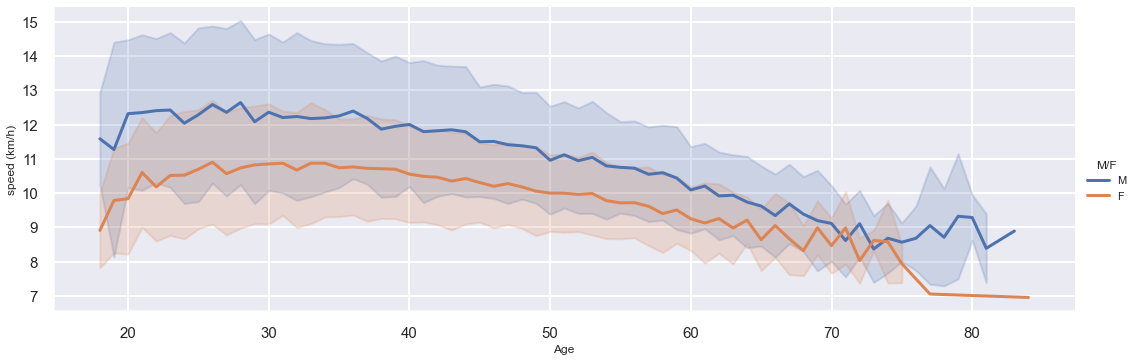

In [148]:
sns.relplot(data = bm, x = "Age", y = "speed (km/h)", hue = "M/F", kind = "line", ci = "sd", aspect = 3);

In [149]:
iris = pd.read_csv("iris.csv")

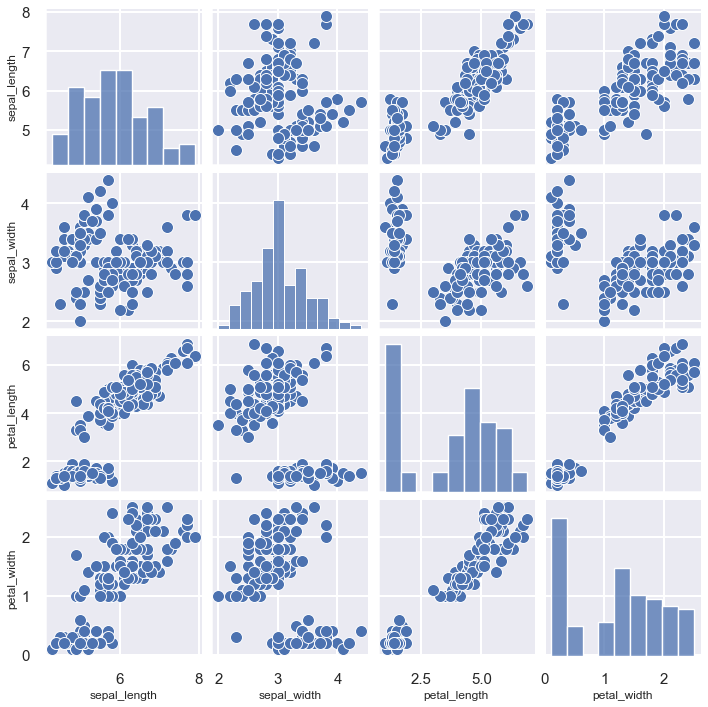

In [150]:
sns.pairplot(data = iris);

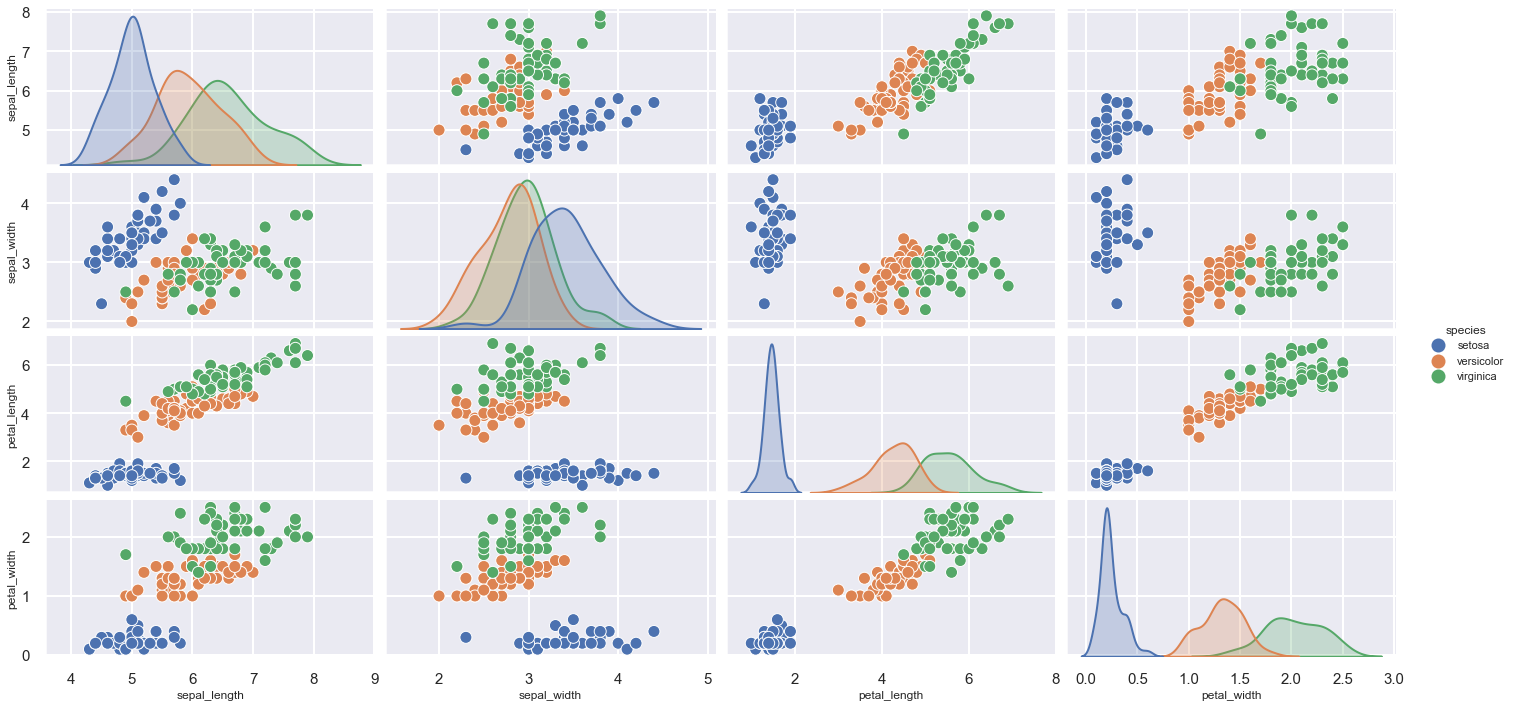

In [152]:
sns.pairplot(iris, hue = "species", aspect = 2);